# K means clustering på bildepiksler 

En morsom anvendelse av K means er å bruke clustering på bildepiksler. Alle digitale bilder består av piksler. Hvis du zoomer langt nok inn på et bilde kan du se at bildte består av mange små firkanter. Disse firkantene kaller vi piksler. I et svart-hvitt bilde tilsvarer vær piksel et tall mellom 0 og 255. Jo høyere tallet er, desto lysere er pikselen. I et fargerom er hver piksel tre tall. Det første tallet sier hvor mye rødt det er i pikselen, det andre tallet sier hvor mye grønt og det tredje tallet sier hvor mye blått. Dette systemet kaller vi for RGB (Rødt-Grønt-Blått). 

Vi kan også se på disse tre tallene som koordinater i et tredimensjonalt koordinatsystem hvor "rødhet" er på en akse, "grønnhet" er på den neste og "blåhet" er på den tredje aksen. Hvis vi ser på det slik er hver piskel et punkt i koordinatsystemet. Og hvis vær piksel er et punkt, så kan vi gjøre maskinlæring på pikslene i et bilde. 

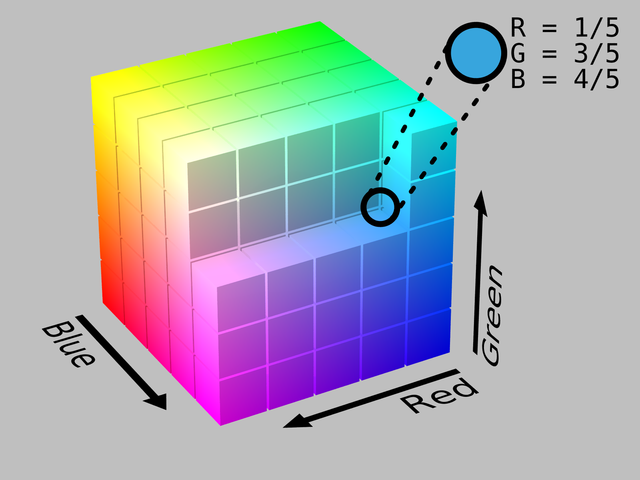

In [2]:
from IPython.display import Image
Image(filename='../datasets/bilder/640px-RGB_Cube_Show_lowgamma_cutout_b.png') 
# By RGB_farbwuerfel.jpg: Horst FrankRGB_color_solid_cube.png: SharkDderivative work: SharkD  Talk - RGB_farbwuerfel.jpgRGB_color_solid_cube.png, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=9803283

Vi begynner med viktig importering og diverse forberedelser

In [8]:
# -*- coding: utf-8 -*-
import numpy as np
from scipy import misc
from  matplotlib.pyplot import *
import seaborn

# Skrur på interaktive plot
%matplotlib notebook

seaborn.set_style("whitegrid", {'axes.grid' : False}) # Fjerner hvitt rutenett fra bilder

## Lese inn bildet
Vi bruker en pakke som heter `scipy` til å lese bildet vi vil bruke og viser det frem med imshow

<IPython.core.display.Javascript object>


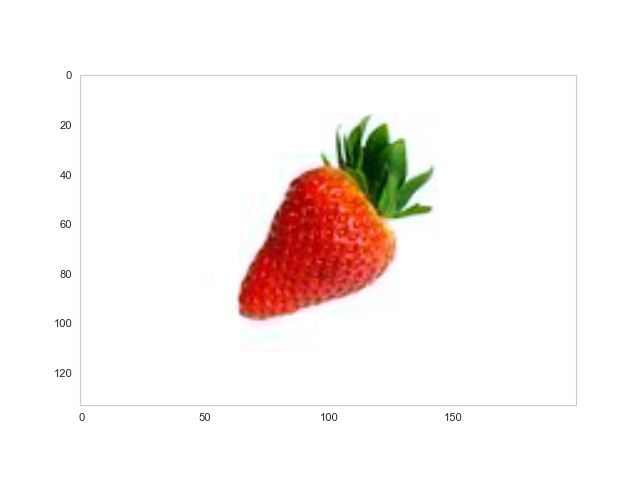

In [10]:
#image = misc.imread('../datasets/bilder/cat2_small.jpeg')
image = misc.imread('../datasets/bilder/strawberry.jpeg')
#image = misc.imread('../datasets/bilder/smile2.jpg')
#image = misc.imread('../datasets/bilder/smile.jpeg')


imshow(image)
show()

## Reshape
For å bruke pikslene som egenskaper for en maskinlæringsalgoritme må vi først "rulle ut" bildet slik at alle pikslene ligger etter hverandre i en lang liste. Til dette kan vi bruke `np.reshape` Hver piksel har tre kanaler (RGB)

In [11]:
features = np.reshape(image, (image.shape[0]*image.shape[1], image.shape[2]))
print "Ny data dimensjon:"
print features.shape

Ny data dimensjon:
(26600L, 3L)


## Scatterplot
Vi kan nå plotte pikslene i et 3 dimensjonalt scatterplot

<IPython.core.display.Javascript object>


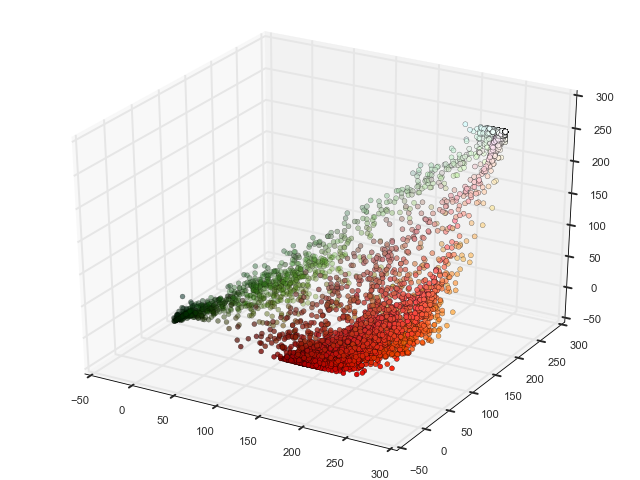

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(features[:,0], features[:,1], features[:,2],facecolors = features/255.)
plt.show()

Vi kan tydelig se at jordbærbildet hovedsakelig har tre clustere med farger, grønt, rødt og hvit. La oss prøve å dele hver piksel inn i en av clusterene

## K means clustering med 3 clustere
For å finne clusterene kan vi bruke `KMeans` fra pakken `sklearn.cluster`

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=10, max_iter=10, n_init=1,init='random')
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=10,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

Når vi fullført clusteringen kan vi plotte clustersenterne

<IPython.core.display.Javascript object>


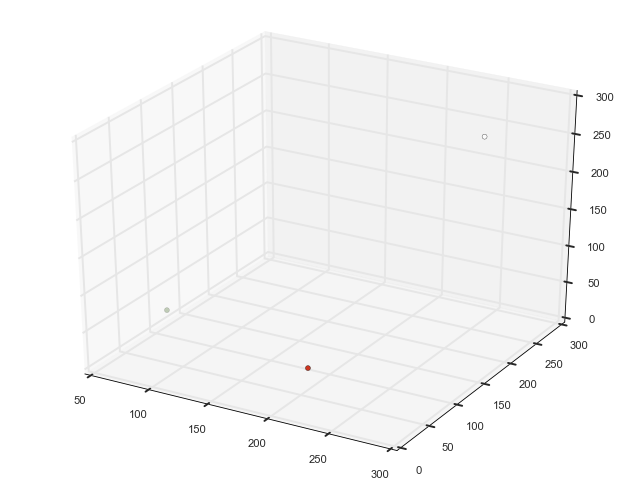

In [18]:
cc = kmeans.cluster_centers_ # hente ut clustercenter
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(cc[:,0], cc[:,1], cc[:,2],facecolors = cc/255.)
plt.show()

Vi kan nå finne hvilket cluster hver piksel hører til

In [19]:
labels = kmeans.predict(features)

In [20]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image


Og gjennskape bildet med færre farger

<IPython.core.display.Javascript object>


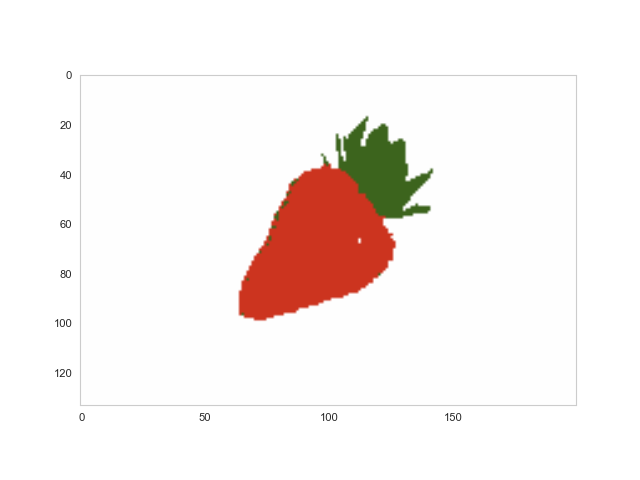

In [21]:
w,h,_ = image.shape

new_image = recreate_image(kmeans.cluster_centers_, labels, w, h)/255.

plt.figure()
plt.imshow(new_image)
plt.show()

Nå har vi fått ut en slags plakat-aktig figur av jordbæret som bare bruker tre farger, rødt, grønt og hvitt.  Vi kan også se på clusterene våre i et nytt scatterplott

<IPython.core.display.Javascript object>


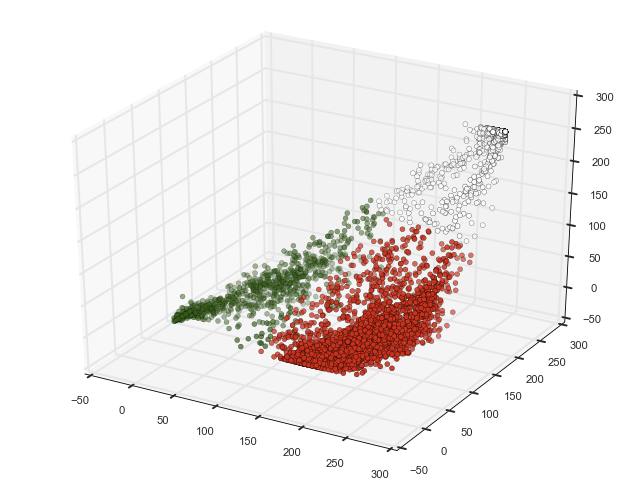

In [24]:
new_features = np.reshape(new_image, (image.shape[0]*image.shape[1], image.shape[2]))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(features[:,0], features[:,1], features[:,2],facecolors = new_features)
plt.show()

**Oppgave 1:** Prøv å gjøre k means clustering på et annet bilde. Bruk en av bildene som følger med eller ta et nytt med telefonen din. Eksperimenter med forskjellig antall clustere og se hvordan resultatet blir. 